In [1]:
import json
import stanza
import numpy as np

In [2]:
from collocations.noun_collocation_extractor import NounCollocationExtractor

In [3]:
from scipy.spatial import distance

In [4]:
def load_json(file):
    with open(file, 'r') as f:
        return json.load(f)

In [5]:
def save_data_to_json(data, file):
    with open(file, 'w') as f:
        json.dump(data, f)

In [6]:
def generate_text_from_collocaton(collocation):
    text = collocation[0]['text'].lower()
    
    for i in range(1, len(collocation)):
        token = collocation[i]
        if 'upos' in token and token['upos'] != 'PUNCT':
            text += " "
        text += token['text']
    
    return text

In [7]:
def get_nouns(nlp, text: str):
    nouns = []
    doc = nlp(text)
    for sent in doc.sentences:
        for token in sent.to_dict():
            if 'upos' in token and token['upos'] == 'NOUN':
                nouns.append([token['text'], token['lemma']])
    return nouns

In [8]:
def get_noun_lemmas(nlp, text: str):
    nouns = []
    doc = nlp(text)
    for sent in doc.sentences:
        for token in sent.to_dict():
            if 'upos' in token and token['upos'] == 'NOUN':
                nouns.append(token['lemma'])
    return nouns

In [9]:
def define_topic_for_noun(noun, topic_important_nouns, synonym_dict):
    for topic, nouns in topic_important_nouns.items():
        if noun in nouns:
            return topic
#         if noun in synonym_dict:
#             for synonyms in synonym_dict[noun]:
#                 if noun in synonyms:
#                     return topic
    return 'Other'
    

In [10]:
nlp = stanza.Pipeline('uk', use_gpu=False)

2020-06-13 02:40:03 INFO: Loading these models for language: uk (Ukrainian):
| Processor | Package |
-----------------------
| tokenize  | iu      |
| mwt       | iu      |
| pos       | iu      |
| lemma     | iu      |
| depparse  | iu      |

2020-06-13 02:40:03 INFO: Use device: cpu
2020-06-13 02:40:03 INFO: Loading: tokenize
2020-06-13 02:40:03 INFO: Loading: mwt
2020-06-13 02:40:03 INFO: Loading: pos
2020-06-13 02:40:04 INFO: Loading: lemma
2020-06-13 02:40:04 INFO: Loading: depparse
2020-06-13 02:40:05 INFO: Done loading processors!


In [11]:
topic_collocations = load_json('dataset/google/topic-collocations.json')

In [12]:
topic_important_nouns = load_json('dataset/google/topic_important_nouns.json')

In [13]:
synonym_dict = load_json('data/synonyms.json')

In [14]:
def detect_collocation_topic(collocation):
    for token in collocation:
        if token['upos'] == 'NOUN':
            predicted_topic = define_topic_for_noun(token['lemma'], topic_important_nouns, synonym_dict)
            return predicted_topic
    
    return 'Other'
            

In [15]:
topic_texts = load_json('dataset/google/topic_texts.json')

In [16]:
count = 0
for k, v in topic_collocations.items():
    count += len(v)

In [17]:
count

50757

In [18]:
merged_topic = {
    'Spa' : 'Fitness',
    'Gym' : 'Fitness',
    'Pool' : 'Fitness',
    'Wellness' : 'Fitness',
    'Room entertainment' : 'Room amenities',
    'Accessibility' : 'Property',
    'Restaurant' : 'Food and Beverage',
    'Air conditioning' : 'Other',
    'Safety' : 'Room amenities',
    'Hot tub' : 'Other',
    'Pets' : 'Other',
    'Bar or lounge' : 'Other',
    'Beach' : 'Other'   
}

In [19]:
for tmp_topic, topic in merged_topic.items():
    if topic not in topic_texts:
        topic_collocations[topic] = []
    topic_collocations[topic] += topic_collocations[tmp_topic]
    del topic_collocations[tmp_topic]

In [20]:
topic_collocations.keys()

dict_keys(['Bathroom and toiletries', 'Cleanliness', 'Sleep', 'Room amenities', 'Parking', 'Property', 'Public transit', 'Nightlife', 'Kitchen', 'Location', 'Service', 'Atmosphere', 'Wi-Fi', 'Breakfast', 'Food and Beverage', 'Fitness', 'Business', 'Family friendly', 'Couple friendly', 'Nature and outdoor activities', 'Other'])

In [21]:
detect_collocation_topic(topic_collocations['Bathroom and toiletries'][4])

'Other'

In [22]:
filtered_topic_collocations = dict()
filtered_topic_collocation_texts = dict()
for topic, collocations in topic_collocations.items():
    filtered_topic_collocations[topic] = []
    filtered_topic_collocation_texts[topic] = []
    for collocation in collocations:
        predicted_topic = detect_collocation_topic(collocation)
        if predicted_topic == topic:
            filtered_topic_collocations[topic].append(collocation)
            filtered_topic_collocation_texts[topic].append(generate_text_from_collocaton(collocation))

In [23]:
filtered_topic_collocation_texts.keys()

dict_keys(['Bathroom and toiletries', 'Cleanliness', 'Sleep', 'Room amenities', 'Parking', 'Property', 'Public transit', 'Nightlife', 'Kitchen', 'Location', 'Service', 'Atmosphere', 'Wi-Fi', 'Breakfast', 'Food and Beverage', 'Fitness', 'Business', 'Family friendly', 'Couple friendly', 'Nature and outdoor activities', 'Other'])

In [24]:
filtered_topic_collocation_texts['Bathroom and toiletries']

['спідьний душ',
 'злив в унітазі не працював',
 'душ і туалет вчасно прибирають',
 'є туалети',
 'тільки коштує душ',
 'полотенець не має',
 'туалет і душ загальний',
 'немає гарячої води',
 'рушники та шампуні є',
 'маленька душева кабінка',
 "рушники м'які",
 'санвузол замалий',
 'цілодобово є гаряча вода',
 'досить маленькі рушники',
 'підлога холодна',
 'окремою ванною кімнатою',
 'сподобався душ',
 'старі рушники',
 'не вистачало мила',
 'чисті рушники',
 'видати полотенця',
 'душових кабінках',
 'нема плісняви',
 'шикарний туалет',
 'холодний душ',
 'дуже маленькі туалети',
 'санвузол спільний',
 'не малесенькі туалети',
 'дуже маленький санвузол',
 'тісні туалети',
 'туалети шалено не зручно',
 'дуже гучні, маленькі ванні кімнати',
 'завжди є гаряча вода і опалення',
 'масажний душ не працює',
 'душових кабінах',
 'не було гарячої води',
 'там надто сильно працювала витяжка',
 'туалети провіряються рідко',
 'гарна і хороша баня дуже',
 'є ванні',
 'гарна лазня при готелі',
 'не

In [25]:
dataset = []
for topic, collocations in filtered_topic_collocations.items():
    for collocation in collocations:
        item = {
            'collocation' : collocation,
            'topic' : topic
        }
        dataset.append(item)    

In [26]:
len(dataset)

17811

In [71]:
save_data_to_json(dataset, 'dataset/google/collocation-topic-dataset.json')

In [ ]:
topic_important_nouns

{'Bathroom and toiletries': ['душова',
  'пліснява',
  'баня',
  'санвузель',
  'засіб',
  'каналізація',
  'ванень',
  'шампуня',
  'поличка',
  'щітка',
  'цвіль',
  'мило',
  'унітаз',
  'злив',
  'гель',
  'кабіна',
  'полотенець',
  'ванна',
  'паста',
  'ванній',
  'підлога',
  'кабінка',
  'душа',
  'грибок',
  'лазня',
  'санвузол',
  'плитка',
  'санвузла',
  'джакуз',
  'тапка',
  'витяжка',
  'кран',
  'тапочка',
  'шампунь',
  'вода',
  'халат',
  'душ',
  'туалет',
  'фен',
  'рушник',
  'санвузло',
  'волосся'],
 'Cleanliness': ['сміття',
  'бруд',
  'запах',
  'вентиляція',
  'прибирання',
  'таракан'],
 'Sleep': ['матрас',
  'постіль',
  'шум',
  'шумоізоляція',
  'простирадла',
  'кроват',
  'ніч',
  'звукоізоляція',
  'пружина',
  'білизна',
  'подушка',
  'сон',
  'матрац',
  'звук',
  'ліжко'],
 'Room amenities': ['вид',
  'вигляд',
  'тв',
  'диван',
  'мебло',
  'доступ',
  'меблі',
  'тераса',
  'дошка',
  'стілець',
  'дах',
  'балкон',
  'чай',
  'канал',
  'се

In [10]:
unique_topic_noun = load_json("unique_topic_noun.json")

In [14]:
import networkx as nx
import matplotlib.pyplot as plt

In [17]:
d = {'1' : [1, 2], '2' : [3]}

In [18]:
G = nx.Graph(d)

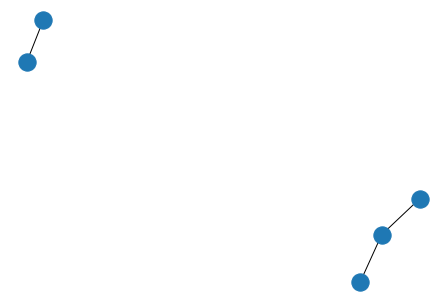

In [19]:
nx.draw(G)
plt.show()